In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

plt.rcParams['figure.figsize'] = (10,10)

In [15]:
pwd

'/home/asa/challenges/dengAI/notebooks/asa'

In [16]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [17]:
X_train = pd.read_csv('../../data/dengue_features_train.csv')

In [20]:
y_train = pd.read_csv('../../data/dengue_labels_train.csv', usecols=['total_cases'])
y_train.head()

,total_cases
0,4
1,5
2,4
3,3
4,6


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [11]:
X_train.head(20)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


In [12]:
X_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


### Initial visualizations

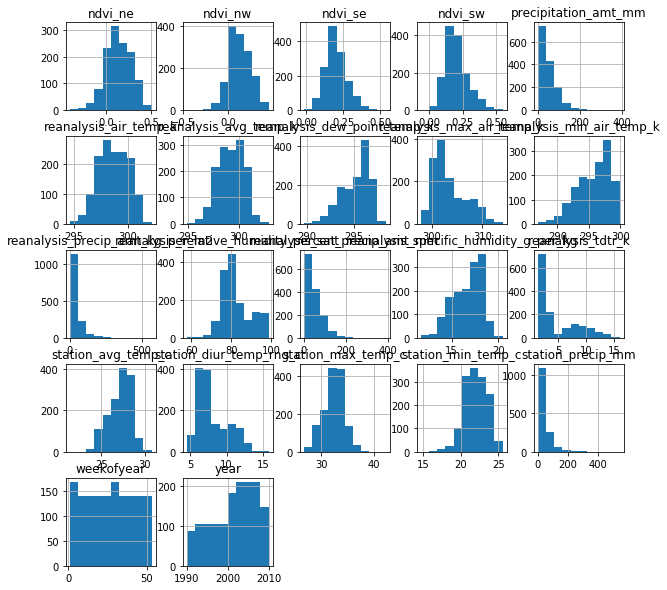

In [13]:
X_train.hist()
plt.show();

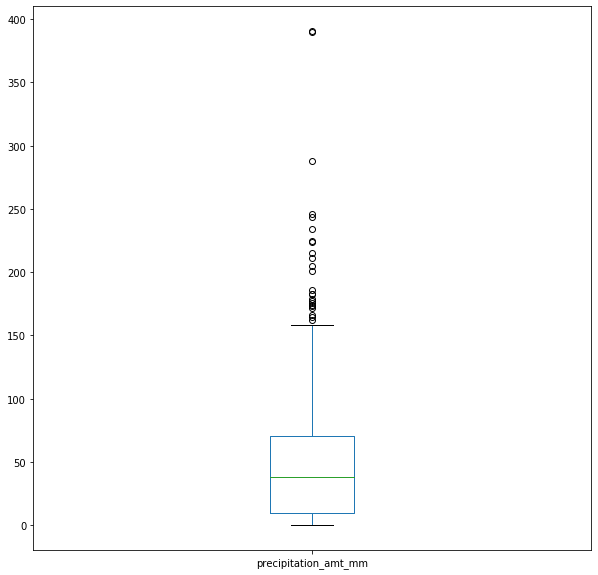

In [14]:
X_train['precipitation_amt_mm'].plot.box();

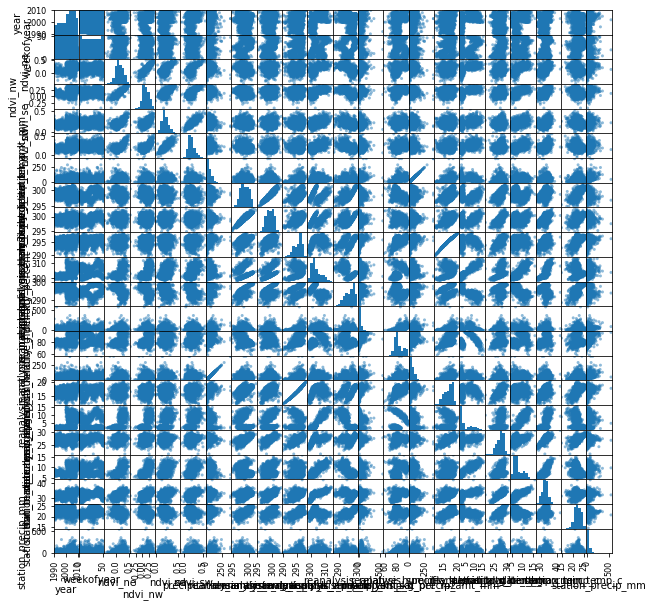

In [51]:
scatter_matrix(X_train);

### Check data integrity (duplicates, where missing/NaN values exist, etc.)

In [16]:
# Duplicate rows
X_train_dup = X_train[X_train.duplicated()]
X_train_dup.shape

(0, 24)

In [55]:
print(X_train.isnull().sum())

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [19]:
X_train_miss_airtempk = X_train[X_train['reanalysis_air_temp_k'].isnull()]
print(X_train_miss_airtempk.shape)
X_train_miss_airtempk.head(30)

(10, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
87,sj,1992,1,1992-01-01,0.125100,0.157867,0.185283,0.181367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,sj,1993,53,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,sj,1998,1,1998-01-01,0.045500,0.047800,0.123986,0.083443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,sj,1999,53,1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
711,sj,2004,1,2004-01-01,-0.268300,-0.123700,0.223757,0.176543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,sj,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1118,iq,2004,1,2004-01-01,0.202571,0.198967,0.244557,0.187957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1170,iq,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1378,iq,2009,1,2009-01-01,0.151286,0.161686,0.153271,0.119443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1430,iq,2010,53,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** 
**Looks like the 10 missing rows for the reanalysis columns are all the same - drop them!**

They are either week 1 or week 53 - likely a data collection issue?
** 

In [56]:
X_train.dropna(axis=0, subset=['reanalysis_air_temp_k'], inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1446 non-null   object 
 1   year                                   1446 non-null   int64  
 2   weekofyear                             1446 non-null   int64  
 3   week_start_date                        1446 non-null   object 
 4   ndvi_ne                                1257 non-null   float64
 5   ndvi_nw                                1399 non-null   float64
 6   ndvi_se                                1429 non-null   float64
 7   ndvi_sw                                1429 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [57]:
print(X_train.isnull().sum())

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  189
ndvi_nw                                   47
ndvi_se                                   17
ndvi_sw                                   17
precipitation_amt_mm                       3
reanalysis_air_temp_k                      0
reanalysis_avg_temp_k                      0
reanalysis_dew_point_temp_k                0
reanalysis_max_air_temp_k                  0
reanalysis_min_air_temp_k                  0
reanalysis_precip_amt_kg_per_m2            0
reanalysis_relative_humidity_percent       0
reanalysis_sat_precip_amt_mm               3
reanalysis_specific_humidity_g_per_kg      0
reanalysis_tdtr_k                          0
station_avg_temp_c                        33
station_diur_temp_rng_c                   33
station_max_temp_c                        10
station_mi

In [35]:
X_train.head(100)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


In [16]:
X_train_miss_airtempk = X_train[X_train['station_avg_temp_c'].isnull()]
print(X_train_miss_airtempk.shape)
X_train_miss_airtempk.head(33)

(43, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
87,sj,1992,1,1992-01-01,0.125100,0.157867,0.185283,0.181367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,sj,1993,53,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,sj,1998,1,1998-01-01,0.045500,0.047800,0.123986,0.083443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,sj,1999,53,1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
711,sj,2004,1,2004-01-01,-0.268300,-0.123700,0.223757,0.176543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,sj,2005,53,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981,iq,2001,20,2001-05-14,0.315343,0.319650,0.262700,0.303486,74.08,297.297143,298.307143,296.990000,305.6,294.7,80.30,98.341429,74.08,18.640000,5.642857,NaN,NaN,32.5,NaN,0.0
987,iq,2001,26,2001-06-25,0.192300,0.275286,0.316457,0.325414,1.22,294.845714,296.000000,290.572857,306.1,288.4,1.82,79.322857,1.22,12.464286,12.342857,NaN,NaN,32.3,17.1,31.0
1031,iq,2002,18,2002-04-30,0.170357,0.141829,0.197729,0.257071,60.05,297.408571,298.550000,296.222857,303.8,292.8,52.60,93.845714,60.05,17.807143,7.500000,NaN,NaN,33.5,21.2,1.0
1047,iq,2002,34,2002-08-20,0.345425,0.313540,0.295050,0.309267,31.71,296.184286,296.735714,292.451429,308.6,288.8,5.61,82.141429,31.71,14.045714,12.757143,NaN,NaN,33.1,20.8,70.6


In [17]:
X_train_miss_airtempk[X_train_miss_airtempk['year']==2008]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1329,iq,2008,4,2008-01-22,0.277971,0.324929,0.221914,0.295671,102.59,297.207143,298.342857,296.250000,304.8,294.8,93.43,95.125714,102.59,17.840000,5.971429,NaN,NaN,31.3,21.9,46.3
1337,iq,2008,12,2008-03-18,0.238333,0.232729,0.123943,0.200071,91.87,296.755714,297.992857,295.475714,305.0,293.3,90.50,93.451429,91.87,16.997143,7.214286,NaN,NaN,31.7,22.0,100.9
1349,iq,2008,24,2008-06-10,0.293743,0.264367,0.246629,0.291957,13.27,296.187143,297.364286,293.891429,305.8,288.2,12.90,88.810000,13.27,15.375714,9.300000,NaN,NaN,NaN,17.8,6.4
1350,iq,2008,25,2008-06-17,0.224029,0.175471,0.265657,0.245214,111.18,296.742857,297.650000,295.934286,304.4,293.8,57.87,95.860000,111.18,17.447143,6.957143,NaN,NaN,NaN,21.0,79.8
1351,iq,2008,26,2008-06-24,0.197043,0.277983,0.213943,0.265614,89.88,296.458571,297.250000,295.192857,304.8,291.2,61.80,93.795714,89.88,16.712857,7.385714,NaN,NaN,NaN,18.0,93.5
1352,iq,2008,27,2008-07-01,0.304829,0.233671,0.248914,0.255814,0.00,296.542857,297.807143,293.830000,304.9,290.7,9.40,86.524286,0.00,15.285714,9.442857,NaN,NaN,NaN,20.8,1.3
1353,iq,2008,28,2008-07-08,0.153850,0.149586,0.329443,0.132886,0.00,296.545714,297.478571,293.594286,305.9,290.5,7.47,85.655714,0.00,15.080000,9.271429,NaN,NaN,NaN,21.0,0.0
1354,iq,2008,29,2008-07-15,0.232386,0.213957,0.220300,0.198429,62.84,296.078571,297.407143,294.691429,304.6,291.8,27.33,93.055714,62.84,16.142857,8.442857,NaN,NaN,NaN,21.0,44.2
1365,iq,2008,40,2008-09-30,0.393086,0.378271,0.343700,0.404843,24.28,299.178571,301.150000,294.761429,310.2,292.4,121.30,79.502857,24.28,16.331429,12.785714,NaN,NaN,36.0,19.6,1.0


In [8]:
X_train_miss_airtempk = X_train[X_train['ndvi_sw'].isnull()]
print(X_train_miss_airtempk.shape)
X_train_miss_airtempk.head(50)

(22, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
139,sj,1993,53,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,sj,1994,52,1994-01-01,NaN,NaN,NaN,NaN,5.25,298.527143,298.778571,294.401429,301.0,296.0,3.40,78.018571,5.25,15.780000,2.442857,26.971429,8.200000,32.8,21.7,0.3
229,sj,1994,38,1994-09-24,NaN,NaN,NaN,NaN,39.22,299.885714,300.035714,295.961429,302.3,298.1,50.70,79.314286,39.22,17.354286,1.985714,28.371429,6.185714,32.2,24.4,34.3
230,sj,1994,39,1994-10-01,NaN,NaN,NaN,NaN,55.88,299.508571,299.642857,295.821429,301.8,297.7,45.20,80.372857,55.88,17.248571,2.600000,28.014286,6.700000,33.9,23.3,31.5
231,sj,1994,40,1994-10-08,NaN,NaN,NaN,NaN,0.63,300.377143,300.500000,295.362857,302.5,298.7,2.80,74.117143,0.63,16.744286,2.628571,28.714286,6.900000,34.4,24.4,8.2
232,sj,1994,41,1994-10-15,NaN,NaN,NaN,NaN,16.70,299.638571,299.621429,295.481429,302.9,297.8,40.80,78.225714,16.70,16.900000,2.728571,28.328571,7.657143,35.0,23.9,39.2
233,sj,1994,42,1994-10-22,NaN,NaN,NaN,NaN,75.57,300.238571,300.400000,295.685714,303.0,298.3,15.81,76.348571,75.57,17.124286,3.028571,28.571429,7.442857,35.0,23.9,5.4
234,sj,1994,43,1994-10-29,NaN,NaN,NaN,NaN,111.52,298.811429,298.857143,296.171429,300.5,297.5,64.85,85.417143,111.52,17.641429,1.657143,27.671429,7.271429,32.8,23.3,39.2
235,sj,1994,44,1994-11-05,NaN,NaN,NaN,NaN,5.41,299.867143,300.050000,295.845714,301.9,298.3,15.60,78.685714,5.41,17.264286,2.328571,28.157143,6.842857,32.2,24.4,1.9
236,sj,1994,45,1994-11-12,NaN,NaN,NaN,NaN,32.26,299.297143,299.128571,295.580000,301.5,297.2,36.60,80.095714,32.26,16.984286,2.228571,27.314286,6.928571,31.7,22.2,54.5


In [59]:
X_train_miss_airtempk = X_train[X_train['ndvi_ne'].isnull()]
print(X_train_miss_airtempk.shape)
X_train_miss_airtempk.head(200)

(189, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1
13,sj,1990,31,1990-07-30,NaN,0.247150,0.379700,0.381357,32.66,299.862857,299.950000,296.172857,303.0,298.3,34.60,80.584286,32.66,17.594286,2.585714,28.242857,8.085714,34.4,22.8,37.6
14,sj,1990,32,1990-08-06,NaN,0.064333,0.164443,0.138857,28.80,300.391429,300.478571,296.532857,302.5,298.8,20.00,79.650000,28.80,17.950000,2.328571,28.200000,7.557143,33.3,23.3,11.4
15,sj,1990,33,1990-08-13,NaN,0.128033,0.206957,0.168243,90.75,299.958571,299.957143,297.035714,302.6,298.5,101.90,84.178571,90.75,18.515714,1.857143,28.042857,6.685714,32.8,22.8,44.7
24,sj,1990,42,1990-10-15,NaN,0.070200,0.181617,0.165750,143.55,299.195714,299.307143,296.544286,301.5,297.5,279.60,85.621429,143.55,18.115714,1.871429,27.628571,7.400000,32.8,23.3,61.8
36,sj,1991,2,1991-01-08,NaN,0.100467,0.251900,0.137617,15.85,297.674286,297.828571,293.282857,299.3,295.8,26.33,76.628571,15.85,14.671429,1.885714,24.914286,6.314286,28.3,21.1,31.7
37,sj,1991,3,1991-01-15,NaN,0.293567,0.259943,0.217900,0.00,297.422857,297.657143,293.412857,299.3,296.1,27.40,78.500000,0.00,14.798571,2.000000,25.242857,6.571429,29.4,21.1,16.5
42,sj,1991,8,1991-02-19,NaN,0.209400,0.108433,0.119400,0.00,297.414286,297.614286,293.631429,300.1,295.8,26.20,79.740000,0.00,15.035714,2.571429,25.842857,8.471429,32.2,20.0,17.8
45,sj,1991,11,1991-03-12,NaN,NaN,0.213250,0.240543,0.00,297.431429,297.635714,293.335714,300.1,295.7,13.37,78.138571,0.00,14.787143,2.728571,25.928571,8.971429,31.7,20.6,3.6


**Further missing data exploration**

The ndvi missing values group for the most complete columns.

There's no clear overlap in missing between the "station_avg_temp_c" and "ndvi_XX" missing values.

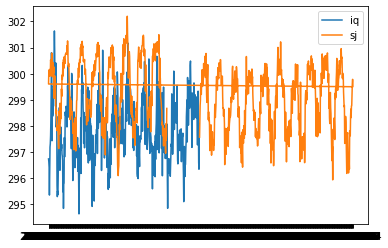

In [42]:
cities = X_train.groupby('city')
for name, group in cities:
    plt.plot(group.week_start_date, group.reanalysis_air_temp_k,label=name)
plt.legend();

In [39]:
cities.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0


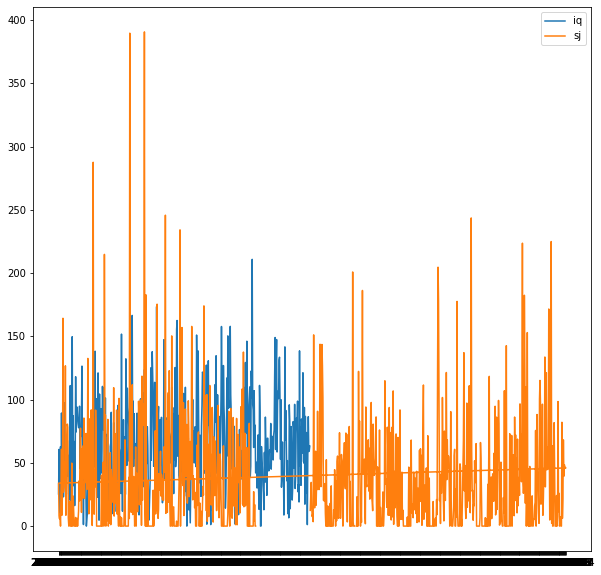

In [63]:
for name, group in cities:
    plt.plot(group.week_start_date, group.precipitation_amt_mm,label=name)
plt.legend();

## For 12/29/20

### Duplicated weather station data - which can be removed?

There are 3 different sources of weather data:

- NOAA's GHCN daily climate data weather station measurements
 (These all start with 'station...')
    
    
- PERSIANN satellite precipitation measurements

 (a single column - 'precipitation')
    
    
- NOAA's NCEP Climate Forecast System Reanalysis measurements

    (These all start with 'reanalysis...')

Let's start with precipitation - this is the only variable in the PERSIANN data, and exists in both the other two sources as well.  It appears to match the the NCEP reanalysis data in all visible rows - let's check all rows

In [20]:
X_train_precip = X_train[['city','year','weekofyear','week_start_date','precipitation_amt_mm',
                          'reanalysis_sat_precip_amt_mm','station_precip_mm']]
X_train_precip.head(20)

,city,year,weekofyear,week_start_date,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,station_precip_mm
0,sj,1990,18,1990-04-30,12.42,12.42,16.0
1,sj,1990,19,1990-05-07,22.82,22.82,8.6
2,sj,1990,20,1990-05-14,34.54,34.54,41.4
3,sj,1990,21,1990-05-21,15.36,15.36,4.0
4,sj,1990,22,1990-05-28,7.52,7.52,5.8
5,sj,1990,23,1990-06-04,9.58,9.58,39.1
6,sj,1990,24,1990-06-11,3.48,3.48,29.7
7,sj,1990,25,1990-06-18,151.12,151.12,21.1
8,sj,1990,26,1990-06-25,19.32,19.32,21.1
9,sj,1990,27,1990-07-02,14.41,14.41,1.1


In [23]:
X_train_precip_nomatch12 = X_train_precip[X_train_precip['precipitation_amt_mm']!=X_train_precip['reanalysis_sat_precip_amt_mm']]
print(X_train_precip_nomatch12.shape)
X_train_precip_nomatch12

(13, 7)


,city,year,weekofyear,week_start_date,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,station_precip_mm
87,sj,1992,1,1992-01-01,NaN,NaN,NaN
93,sj,1992,7,1992-02-12,NaN,NaN,1.3
94,sj,1992,8,1992-02-19,NaN,NaN,8.9
95,sj,1992,9,1992-02-26,NaN,NaN,16.0
139,sj,1993,53,1993-01-01,NaN,NaN,NaN
399,sj,1998,1,1998-01-01,NaN,NaN,NaN
451,sj,1999,53,1999-01-01,NaN,NaN,NaN
711,sj,2004,1,2004-01-01,NaN,NaN,NaN
763,sj,2005,53,2005-01-01,NaN,NaN,NaN
1118,iq,2004,1,2004-01-01,NaN,NaN,NaN


The only rows returned for no match between PERSIANN and NCEP reanalysis are the rows that have NaN values.  Since these values do match, the PERSIANN data is simply a duplicate and can be dropped.

In [24]:
X_train_precip = X_train_precip.drop('precipitation_amt_mm', axis = 1)
X_train_precip.head(10)

,city,year,weekofyear,week_start_date,reanalysis_sat_precip_amt_mm,station_precip_mm
0,sj,1990,18,1990-04-30,12.42,16.0
1,sj,1990,19,1990-05-07,22.82,8.6
2,sj,1990,20,1990-05-14,34.54,41.4
3,sj,1990,21,1990-05-21,15.36,4.0
4,sj,1990,22,1990-05-28,7.52,5.8
5,sj,1990,23,1990-06-04,9.58,39.1
6,sj,1990,24,1990-06-11,3.48,29.7
7,sj,1990,25,1990-06-18,151.12,21.1
8,sj,1990,26,1990-06-25,19.32,21.1
9,sj,1990,27,1990-07-02,14.41,1.1


Now let's look for correlation between the NOAA GHCN daily climate data and the NOAA NCEP reanalysis data.

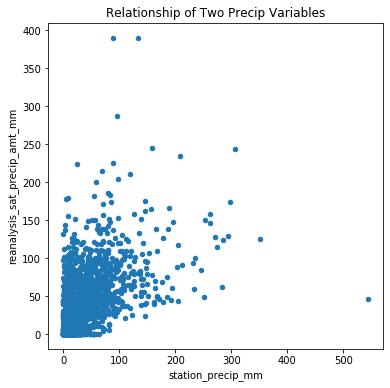

In [27]:
ax = X_train_precip.plot.scatter(x='station_precip_mm', y='reanalysis_sat_precip_amt_mm')

ax.set_title('Relationship of Two Precip Variables')
ax.set_xlabel('station_precip_mm')
ax.set_ylabel('reanalysis_sat_precip_amt_mm')
fig = ax.figure
fig.set_size_inches(6,6)

Poor correlation, and 

In [30]:
X_train_precip_sj = X_train_precip[X_train_precip['city']=='sj']
X_train_precip_iq = X_train_precip[X_train_precip['city']=='iq']

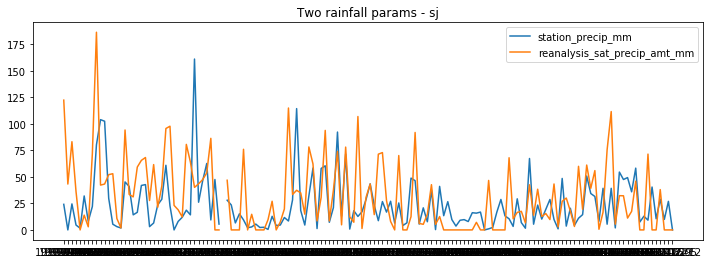

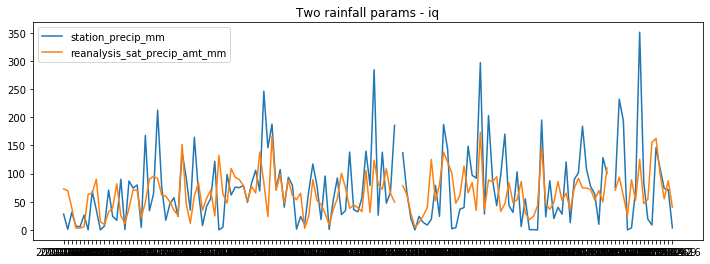

In [53]:
start_row, row_count = 100,150
end_row = start_row + row_count
cities = ['sj', 'iq']
for city in cities:
    X_train_precip_temp = X_train_precip[X_train_precip['city'] == city]
    plt.figure(figsize = (12,4))
    plt.plot(X_train_precip_temp['week_start_date'][start_row: end_row],X_train_precip_temp['station_precip_mm'][start_row: end_row], label = 'station_precip_mm')
    plt.plot(X_train_precip_temp['week_start_date'][start_row: end_row],X_train_precip_temp['reanalysis_sat_precip_amt_mm'][start_row: end_row], label = 'reanalysis_sat_precip_amt_mm')
    plt.title(f'Two rainfall params - {city}')
    plt.legend()
    plt.show()

From reading the data source descriptions, the "station" precip is a daily value (which I assumed is then summed by week for this dataset), and the "reanalysis" data is anywhere between a 1-6 hour average.  It's unclear how the latter is convereted into weekly data.  Generally, the two variables track over time, but there is a significant difference in variability between the two, and inconsistently.  In San Juan, the reanalysis is more variable, while in Iquitos it's the daily station data that shows more variation.

It's not clear how to reconcile these two similar measurements, nor is it clear that one is a "better" measurement.

## Missing vegetation data - nvdi_

In [7]:
X_train_veg = X_train[['city','year','weekofyear','week_start_date','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']]
X_train_veg.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340


In [11]:
X_train_veg.dropna(axis=0, subset=['ndvi_sw'], inplace=True)
X_train_veg.isnull().sum()

/home/asa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


city                 0
year                 0
weekofyear           0
week_start_date      0
ndvi_ne            172
ndvi_nw             30
ndvi_se              0
ndvi_sw              0
dtype: int64

## Seaborn heat map

In [42]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.tail(20)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1436,iq,2010,6,2010-02-12,0.230757,0.189257,0.163486,0.238871,78.25,298.251429,299.678571,297.568571,306.2,295.5,172.70,96.515714,78.25,19.345714,6.328571,27.000000,8.300000,33.2,22.9,14.5,12
1437,iq,2010,7,2010-02-19,0.293300,0.247829,0.206629,0.266671,32.19,299.648571,300.950000,297.090000,309.2,294.5,54.20,88.365714,32.19,18.857143,9.414286,27.300000,11.800000,35.5,21.4,60.9,19
1438,iq,2010,8,2010-02-26,0.303657,0.260057,0.225486,0.333314,84.67,298.917143,300.485714,297.928571,308.2,295.2,288.40,94.915714,84.67,19.772857,8.171429,28.020000,10.360000,35.4,21.4,29.9,15
1439,iq,2010,9,2010-03-05,0.127317,0.181160,0.120467,0.142767,80.58,298.337143,299.664286,297.917143,306.3,295.8,144.98,97.700000,80.58,19.754286,6.242857,28.500000,9.900000,35.4,21.2,9.9,12
1440,iq,2010,10,2010-03-12,0.311729,0.292686,0.272586,0.394800,57.78,298.837143,300.092857,298.141429,306.9,292.8,86.10,96.250000,57.78,20.091429,8.814286,28.550000,10.050000,35.4,21.4,44.5,12
1441,iq,2010,11,2010-03-19,0.294600,0.250971,0.281471,0.341643,121.20,299.191429,300.928571,298.450000,307.4,294.0,191.76,96.124286,121.20,20.461429,8.828571,30.000000,12.000000,36.0,22.0,22.9,16
1442,iq,2010,12,2010-03-26,0.266286,0.301233,0.296000,0.295743,51.29,299.004286,300.300000,297.555714,307.9,294.6,214.90,93.082857,51.29,19.368571,8.028571,27.466667,9.333333,34.5,21.0,20.0,9
1443,iq,2010,13,2010-04-02,0.141433,0.204729,0.250971,0.145243,49.80,299.002857,300.714286,296.568571,309.1,294.2,24.25,88.707143,49.80,18.214286,9.514286,27.933333,12.300000,35.3,21.0,16.0,4
1444,iq,2010,14,2010-04-09,0.242843,0.272757,0.202271,0.260114,93.76,299.115714,300.271429,298.161429,308.4,294.6,164.70,95.182857,93.76,20.078571,7.714286,29.200000,12.300000,35.4,22.5,NaN,9
1445,iq,2010,15,2010-04-16,0.157686,0.156614,0.184014,0.135886,17.33,298.305714,299.557143,297.002857,307.3,294.3,150.80,93.655714,17.33,18.677143,7.228571,27.150000,9.600000,33.0,21.2,18.0,6


In [24]:
corr_mat = df_train.corr()
print(corr_mat)

                                           year  weekofyear   ndvi_ne  \
year                                   1.000000   -0.071649  0.223361   
weekofyear                            -0.071649    1.000000  0.053548   
ndvi_ne                                0.223361    0.053548  1.000000   
ndvi_nw                                0.144345    0.048759  0.850902   
ndvi_se                                0.234234    0.121557  0.614380   
ndvi_sw                                0.277759    0.068701  0.669504   
precipitation_amt_mm                   0.205302    0.118037  0.205736   
reanalysis_air_temp_k                 -0.140016    0.425753 -0.340976   
reanalysis_avg_temp_k                  0.085043    0.463677 -0.037682   
reanalysis_dew_point_temp_k            0.132273    0.348946  0.056077   
reanalysis_max_air_temp_k              0.480402    0.238078  0.634330   
reanalysis_min_air_temp_k             -0.392351    0.179679 -0.623116   
reanalysis_precip_amt_kg_per_m2        0.132625    

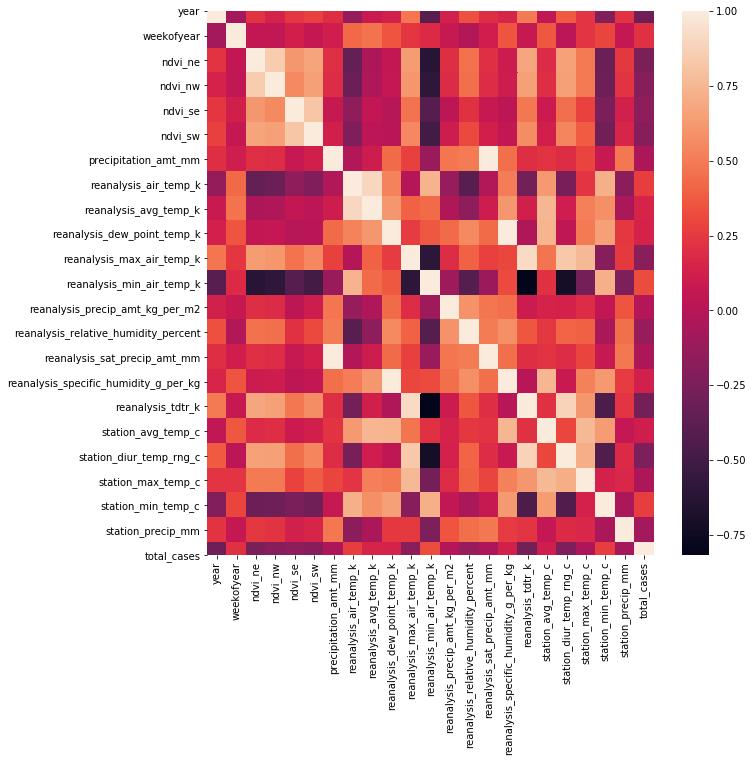

In [23]:
sns.heatmap(corr_mat)

In [28]:
veg_params = ['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']
corr_mat.loc[veg_params]['total_cases']

ndvi_ne   -0.241376
ndvi_nw   -0.202235
ndvi_se   -0.168612
ndvi_sw   -0.196461
Name: total_cases, dtype: float64

In [37]:
corr_abs = np.abs(corr_mat[['total_cases']])
corr_ranked = corr_abs[['total_cases']].sort_values(by='total_cases', ascending=False)
corr_ranked


,total_cases
total_cases,1.000000
reanalysis_min_air_temp_k,0.325252
year,0.306806
reanalysis_tdtr_k,0.278483
station_min_temp_c,0.267109
reanalysis_air_temp_k,0.264952
ndvi_ne,0.241376
station_diur_temp_rng_c,0.237844
weekofyear,0.216452
ndvi_nw,0.202235


No handles with labels found to put in legend.


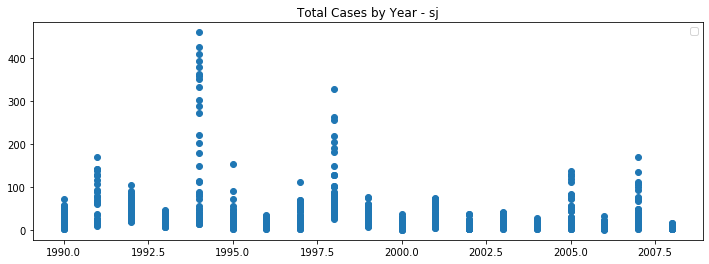

No handles with labels found to put in legend.


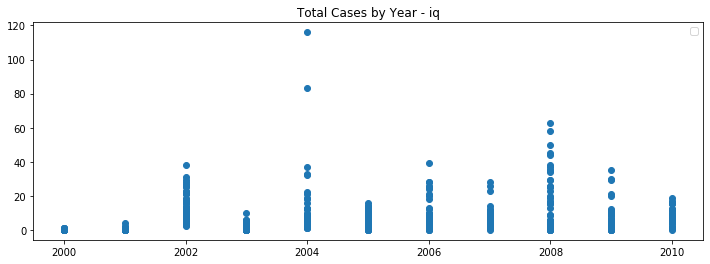

In [54]:
cities = ['sj', 'iq']
for city in cities:
    df_train_temp = df_train[df_train['city'] == city]
    plt.figure(figsize = (12,4))
    plt.scatter(df_train_temp['year'],df_train_temp['total_cases'])
    plt.title(f'Total Cases by Year - {city}')
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


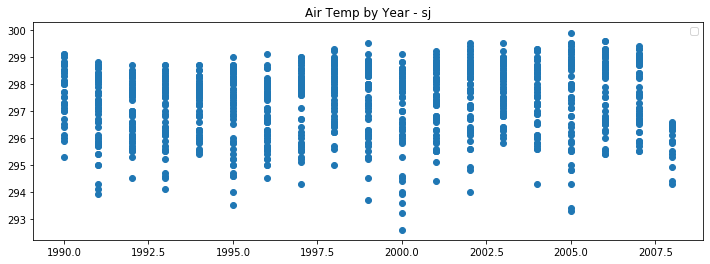

No handles with labels found to put in legend.


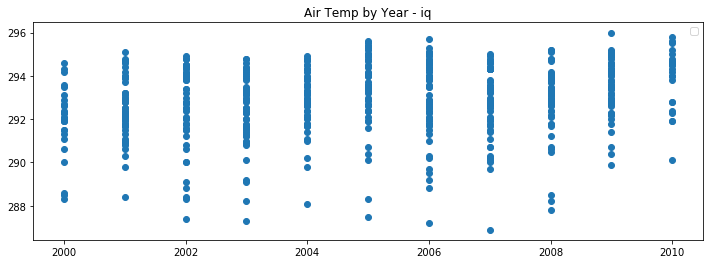

In [53]:
for city in cities:
    df_train_temp = df_train[df_train['city'] == city]
    plt.figure(figsize = (12,4))
    plt.scatter(df_train_temp['year'],df_train_temp['reanalysis_min_air_temp_k'])
    plt.title(f'Air Temp by Year - {city}')
    plt.legend()
    plt.show()

In [61]:
df_train.drop(['precipitation_amt_mm','station_min_temp_c','station_max_temp_c','station_avg_temp_c','station_precip_mm','station_diur_temp_rng_c'], axis=1, inplace = True)
print(df_train.shape)
df_train.head()

(1456, 19)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,6


In [62]:
df_train.dropna(subset=['reanalysis_air_temp_k', 'ndvi_sw'], inplace=True)
df_train.shape

(1429, 19)

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [78]:
df_train.dropna(subset=['ndvi_ne', 'ndvi_nw'], inplace=True)

In [81]:
df_train.dropna(subset=['reanalysis_sat_precip_amt_mm'], inplace=True)

In [82]:
y = df_train['total_cases']
X = df_train.drop('total_cases', axis=1)
##X = X.drop('city', axis=1)
numer_col_names = [col for col in X.columns if X[col].dtype != 'object']
X = X[numer_col_names]
X.info()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
##  Should be stratified by City

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1455
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   year                                   1242 non-null   int64  
 1   weekofyear                             1242 non-null   int64  
 2   ndvi_ne                                1242 non-null   float64
 3   ndvi_nw                                1242 non-null   float64
 4   ndvi_se                                1242 non-null   float64
 5   ndvi_sw                                1242 non-null   float64
 6   reanalysis_air_temp_k                  1242 non-null   float64
 7   reanalysis_avg_temp_k                  1242 non-null   float64
 8   reanalysis_dew_point_temp_k            1242 non-null   float64
 9   reanalysis_max_air_temp_k              1242 non-null   float64
 10  reanalysis_min_air_temp_k              1242 non-null   float64
 11  rean

In [84]:
rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [85]:
y_pred = rf.predict(X_test)

In [86]:
mae = rf.score(X_test, y_test)
mae

0.48444165292033037

In [87]:
from sklearn.metrics import mean_absolute_error

In [89]:
mean_absolute_error(y_test, y_pred)

11.4740562248996

## Initial RF Model - MAE = 11.47
##### Doesn't include 'city' or 'date_start_week' and has all NaN values removed

In [90]:
rf.feature_importances_

array([0.25104567, 0.14515282, 0.04310902, 0.04242441, 0.04404507,
       0.03934188, 0.04791651, 0.03883044, 0.04850024, 0.03504987,
       0.05820766, 0.04177887, 0.03676798, 0.04222013, 0.04048386,
       0.04512554])

In [92]:
X.columns

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k'],
      dtype='object')